### Chapter 3

# 자동미분 및 손실함수

> ## 학습 목표

-   다양한 손실 함수(예: MSE, Cross-Entropy)의 정의와 목적을 이해하고, 특정 문제(회귀/분류)에 적합한 손실 함수를 선택하여 파이토치로 구현할 수 있다.
    
-   경사하강법의 기본 원리(기울기 계산 및 가중치 업데이트)를 이해하고, 이를 사용하여 파라미터를 최적화하는 과정을 파이토치로 구현할 수 있다. 

    또한, 다양한 변형 기법(예: 모멘텀, Adam 등)의 차이점을 설명할 수 있다.
    
-   자동 미분의 원리를 이해하고, 파이토치의 `autograd` 기능을 활용하여 복잡한 모델의 기울기를 자동으로 계산하는 방법을 이해하고, 

    이를 통해 손실 함수를 최적화하는 과정에서 자동 미분을 효과적으로 활용할 수 있다.

## 3.1 손실함수 정의

> ### 손실 함수란?

-   신경망은 "하나의 지표"를 기준으로 최적의 매개변수 값을 탐색한다. **신경망 학습에서 사용하는 지표를 손실함수**라고 한다.
-   손실 함수는 신경망 성능의 "나쁨"을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 "못"하느냐를 나타낸다.
-   일반적으로 손실함수로 (교차 엔트로피) 와 (오차제곱합)을 사용한다.

> ### 왜 손실함수를 이용하는가?

- "정확도"라는 지표를 나두고 "손실함수"라는 우회적인 방법을 선택하는 이유는 바로 신경망 학습에서의 "미분"때문이다. 

- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 

   이때 매개변수의 미분을 계산하고, 그 미분값을 단서로 매개 변수의 값을 서서히 갱신하는 과정을 반복한다.  

- 미분값이 음수면 가중치 매개변수를 양의 방향으로 변환시켜 손실 함수의 값을 줄일 수 있고, 반대로 미분 값이 양수이면 가중치 매개변수를 음의 방향으로 변환시켜 손실 함수의 값을 줄일 수 있다.

- 손실함수(Loss funtion)는 모델의 예측 데이터와 실제 데이터와의 거리를 측정하는 함수입니다.
- 손실함수는 모델 학습 과정에서 최적화에 사용합니다. 
- 파이토치에서는 torch.nn.Module을 상속받아 사용자 정의 손실 함수를 만들 수 있습니다.
- 손실함수는 회귀 문제에서 평균제곱오차(mean squared error, MSE)를 적용합니다.
- 분류 문제는 크로스엔트로피오차(cross entropy error, CEE)를 적용합니다.
- MSE는 예측값과 실제 값의 차이를 제곱하여 평균을 내는 방식으로 손실을 계산합니다.
- CEE는 실제 클래스와 예측 클래스 확률 분포 간의 차이를 측정합니다.

### 3.1.1 사용자 정의 손실함수

### **평균 제곱 오차(Mean Square Error, MSE)**

- forward 메서드에서는 모델의 출력과 실제 값을 받아 오차를 계산합니다. 
- outputs와 targets 사이의 차이를 제곱하여 평균을 구하는 **평균 제곱 오차(MSE)** 를 사용했습니다.
- 실제 데이터와 예측 데이터 차이(=오차)의 제곱에 대해 평균을 취한 것
- 입력 값이 여러 개인 경우, 가설을 세우고 값이 조건에 충족하는지 판단해서 조금씩 수정해 나가면서 오차가 최소가 될 때까지 반복하는 방법 사용
- 값을 조금씩 수정해 나가는 과정에서 오차를 평가하는 방법이 평균 제곱 오차
- 평균 제곱 오차에서 구한 값을 바탕으로 오차 최소화되는 값 구해야 함

<img width="300" height="" src="./image/mse.png" >

hat yi : 신경망의 출력(신경망이 추정한 값), yi : 실제값, N:데이터 차원의 수

1. 각 데이터에서 오차를 구한다

2. 각 오차 값을 제곱한 후, 모두 더한다. (부호가 있으면 정확한 오차 구하기 힘드므로 제곱 사용)

3. 오차의 제곱 합을 원소의 총 개수로 나눈다. (오차의 합을 n(원소의 총 개수)로 나눈 것)

1\. y = 3x + 76이라는 직선의 방정식을 가설로 세웠을 때, 오차는

<table style="border-collapse: collapse; width: 99.5349%; height: 143px;" border="1" data-ke-align="alignLeft"><tbody><tr style="height: 19px;"><td style="width: 20%; text-align: center; height: 19px;">공부한 시간</td><td style="width: 20%; text-align: center; height: 19px;">2</td><td style="width: 20%; text-align: center; height: 19px;">4</td><td style="width: 20%; text-align: center; height: 19px;">6</td><td style="width: 20%; text-align: center; height: 19px;">8</td></tr><tr style="height: 19px;"><td style="width: 20%; text-align: center; height: 19px;">성적</td><td style="width: 20%; text-align: center; height: 19px;">81</td><td style="width: 20%; text-align: center; height: 19px;">93</td><td style="width: 20%; text-align: center; height: 19px;">91</td><td style="width: 20%; text-align: center; height: 19px;">97</td></tr><tr style="height: 19px;"><td style="width: 20%; text-align: center; height: 19px;">예측 값</td><td style="width: 20%; text-align: center; height: 19px;">82</td><td style="width: 20%; text-align: center; height: 19px;">88</td><td style="width: 20%; text-align: center; height: 19px;">94</td><td style="width: 20%; text-align: center; height: 19px;">100</td></tr><tr style="height: 19px;"><td style="width: 20%; text-align: center; height: 19px;">오차(실제 값 - 예측 값)</td><td style="width: 20%; text-align: center; height: 19px;">1</td><td style="width: 20%; text-align: center; height: 19px;">-5</td><td style="width: 20%; text-align: center; height: 19px;">3</td><td style="width: 20%; text-align: center; height: 19px;">3</td></tr></tbody></table>

2\. 각 오차의 값을 제곱한 후, 모두 더하면

> 1 + 25 + 9 + 9 = 44

3\. 오차의 제곱합을 원소의 총 개수로 나누면

> 1/4 \* 44 = 11

In [1]:
# 넘파이 라이브러리 불러오기
import numpy as np

# 가상의 기울기 a와 y절편 b를 정하기
fake_a=3
fake_b=76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듦
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [2]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수 생성
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듦
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))


공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [3]:
# 평균 제곱 오차 함수를 각 y값에 대입하여 최종 값을 구하는 함수
n=len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)
 
# 평균 제곱 오차 값을 출력
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


In [4]:
import torch
import torch.nn as nn

# nn.Module 상속받음
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, outputs, targets):
        # MSE (Mean Squared Error) 손실 함수 구현
        loss = torch.mean((outputs - targets) ** 2) 
        # torch.mean과 출력값과 정답과의 차이의 제곱 연산
        return loss   # 손실함수 값 반환한다

> ### 교차 엔트로피 오차(Cross Entropy Error, CEE)
- F.softmax(outputs, dim=1)에서 outputs은 로짓(logits)값으로 소프트맥스 통해 확률 값으로 변환합니다.
- torch.log(target_probs) 정답 클래스의 확률에 대해 로그를 취하고, 음수 부호를 붙입니다.

교차 엔트로피 오차의 수식에서 log는 밑이 e인 자연로그이다. t는 원-핫 인코딩으로 표현된 정답 레이블이므로, 결국 실제로 정답일 때 (t=1)의 softmax 추정 값에 대한 자연로그를 계산하는 식이 된다. 

예를 들어, 정답 레이블이 2이고, 신경망의 softmax 출력 값이 0.6이면 교차 엔트로피 오차는 -log0.6=0.51이 된다. 

같은 조건에서 신경망의 출력 값이 0.1이면 -log0.1=2.30이 된다. 결론적으로, 교차 엔트로피 오차는 정답일 때의 신경망 출력 값이 전체 값이 된다.

x=1일 때 y=0이고, x가 0에 가까워 질수록 y는 작아진다. 

이것을 교차 엔트로피 오차의 수식에 적용하여 마이너스를 붙이면 반대가 된다. 즉, 예측 값이 커질수록 오차는0에 가까워지고, 예측 값이 작아질수록 오차는 커진다.

<img width="300" height="" src="./image/cee.png" >

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCrossEntropyLoss(nn.Module):
    def __init__(self):
        super(CustomCrossEntropyLoss, self).__init__()

    def forward(self, outputs, targets):
        # 소프트맥스를 적용하여 확률 분포로 변환
        probs = F.softmax(outputs, dim=1)
        
        # 각 샘플에 대해 정답 클래스의 확률 값을 추출
        # targets 정수 레이블, gather 확률 추출
        target_probs = probs.gather(1, targets.view(-1, 1))
        
        # 크로스 엔트로피 손실 계산
        loss = -torch.log(target_probs).mean()
        
        return loss

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 3개의 클래스와 5개의 샘플
outputs = torch.randn(5, 3)  
# 모델의 예측 값 (5개의 샘플, 3개의 클래스에 대한 로짓)
targets = torch.randint(0, 3, (5,))  
# 실제 클래스 (정수 클래스 레이블, 5개 샘플)

# 사용자 정의 크로스 엔트로피 손실 함수 사용
loss_fn = CustomCrossEntropyLoss()
loss = loss_fn(outputs, targets)

print(loss)

tensor(0.7003)


### 3.1.2 파이토치에서 제공하는 손실함수

- 평균 제곱 오차(MSE) 손실 함수 사용

  `loss_fn = nn.MSELoss()`

  `loss = loss_fn(outputs, targets)`

In [7]:
import torch
import torch.nn as nn

# 실제 값과 예측 값
y_true = torch.tensor([3.0, 5.0, 2.0])
y_pred = torch.tensor([2.5, 4.5, 2.0])

# MSELoss 객체 생성
mse_loss = nn.MSELoss()

# 손실 계산
loss = mse_loss(y_pred, y_true)
print(f'Mean Squared Error: {loss.item():.4f}')  # 손실 값 출력

Mean Squared Error: 0.1667


In [8]:
import torch
import torch.nn as nn

# 평균제곱오차를 정의하면 아래와 같다.

# 손실함수로 평균제곱오차 정의
# y_pred: 예측값 (모델의 출력)
# y_true: 실제값 (정답)
def mean_squared_error(y_pred, y_true): # 손실함수가 예측값과 실제값을 입력받는다.
    return torch.mean((y_pred - y_true) ** 2)  
# 두 값의 차이의 제곱에 평균을 계산하여 손실값을 반환한다.

- 크로스 엔트로피 오차 nn.CrossEntropyLoss()
- CrossEntropyLoss는 소프트맥스와 로그 손실을 한 번에 계산할 수 있습니다.

In [9]:
import torch
import torch.nn as nn

# 3개의 클래스와 5개의 샘플
outputs = torch.randn(5, 3)  
# 모델의 예측 값 (5개의 샘플, 3개의 클래스에 대한 로짓)
targets = torch.randint(0, 3, (5,))  
 # 실제 클래스 (0~2까지의 정수 클래스 레이블, 5개 샘플)

# 내장된 CrossEntropyLoss 사용
loss_fn = nn.CrossEntropyLoss() 
loss = loss_fn(outputs, targets)  # 손실 계산

print(loss)

tensor(1.2388)


### **손실 함수를 설정하는 이유**

**신경망 학습에서의 '미분' 역할**에 있다.

신경망 학습에서 최적의 매개변수를 탐색할 때, 매개변수에 대해 미분(기울기)을 계산하고 미분 값을 갱신하는 과정을 반복함으로써 손실 함수의 값을 가능한 작게 하는 매개변수를 찾는다.

미분 값이 양수이면 매개변수를 음의 방향으로 갱신하고, 음수이면 양의 방향으로 갱신한다.

반면, 정확도를 지표로 삼으면 대부분의 미분 값이 0이 이므로 갱신할 수 없다. 

예를 들어, 100장의 데이터 중 30장을 제대로 인식한다고 가정하면, 정확도는 30%이다. 

이때 매개변수 값을 미세하게만 조정한다면 정확도가 개선되지 않고 일정할 것이다. 

왜냐하면 30%, 31%, 32%와 같이 불연속적으로 개선되고 30.0133%와 같이 조정되지는 않기 때문이다. 

즉, 손실함수는 매개변수의 값이 조금 변하면 그에 연속적인 값으로 반응하지만, 정확도는 거의 반응을 보이지 않는다. 

★ 신경망 학습에서는 기울기가 0이 되지 않는 덕분에 올바르게 학습할 수 있다.

## 3.2 경사하강법 원리

- 경사하강법(gradient descent)은 딥러닝 모델을 훈련하는 데 중요한 최적화 알고리즘입니다.
- 경사하강법은 손실 함수가 최소가 되는 방향으로 모델 파라미터(W, b)를 업데이트하여 점진적으로 최적화합니다.
- 학습률과 배치 크기 같은 하이퍼파라미터를 설정하는 것은 경사하강법의 성능에 영향을 주는 중요한 요소입니다.
- torch.optim에는 SGD, Adam 등 최적화 알고리즘이 구현되어 있습니다. 
- Adam 옵티마이저는 두 가지 모멘텀으로 파라미터 업데이트를 실행합니다. 1차 모멘텀(moving average of gradients): 기울기(gradient)의 평균을 추적하여 파라미터 업데이트에서 일관성을 유지합니다. 2차 모멘텀(moving average of squared gradients): 기울기의 제곱값의 평균을 추적하여 학습률을 적응적으로 조절합니다.

<img src="./image/3.2_경사하강법 최소지점찾기.png" width="500">
<figcaption>그림 3.2 경사하강법 최소지점찾기</figcaption>

<img src="./image/3.3_grad.png" width="500">
<figcaption>그림 3.3 경사하강법</figcaption>

### 3.2.1 SGD(확률적 경사하강법)

- torch.optim.SGD를 사용하여 경사하강법을 적용할 수 있습니다. 
- SGD는 모델의 파라미터를 최적화하는 데 사용됩니다.

In [10]:
import torch
import torch.optim as optim

In [11]:
import torch
import torch.optim as optim
import torch.nn as nn

# 모델 정의
model = torch.nn.Linear(10, 2)  # 10개의 입력 특성, 2개의 출력 클래스

# 손실 함수 정의
criterion = torch.nn.CrossEntropyLoss()

# 옵티마이저 정의 (확률적 경사하강법)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 데이터
inputs = torch.randn(64, 10)  # 64개의 샘플, 10개의 입력 특성
targets = torch.randint(0, 2, (64,))  # 64개의 샘플, 2개의 클래스 레이블

# 학습 과정
optimizer.zero_grad()  # 기울기 초기화
outputs = model(inputs)  # 모델의 출력 계산
loss = criterion(outputs, targets)  # 손실 계산
loss.backward()  # 기울기 계산
optimizer.step()  # 파라미터 업데이트

### 3.2.2 경사하강법 특징

- 학습률(learning rate)은 경사하강법에서 중요한 하이퍼파라미터 중 하나입니다. 
- 학습률이 너무 크면 최적점에 도달하지 못하고 발산할 수 있고, 너무 작으면 학습이 너무 느려질 수 있습니다.
- 경사하강법은 손실함수의 지역 최소값(local minimum)에 빠질 수 있습니다. 
- 지역 최솟값은 최적의 해가 아니며 클로벌 최솟값을 찾아야합니다. 여기에 사용하는 최적화 기법이 Adam입니다.
- 배치 크기(batch size)에 따라 학습 속도와 정확도가 달라집니다. 작은 배치를 사용하면 더 자주 업데이트 되지만 불안정할 수 있고, 큰 배치를 사용하면 안정적이지만 계산 비용이 더 많이 듭니다.

## `경사하강법을 이용한 모델 학습 실습`

- 필요한 라이브러리 불러오기

- 데이터 생성
- rand 0~1 사이 랜덤 값 100개 생성

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 생성
# 선형 데이터 y = 2x + 1 (노이즈 추가)
np.random.seed(0)
X_train = np.random.rand(100, 1).astype(np.float32)
y_train = 2 * X_train + 1 + np.random.normal(0, 0.1, (100, 1)).astype(np.float32)

# 2. 파이토치 텐서로 변환
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

# 3. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 선형 계층 정의 (입력 1, 출력 1)
        self.linear = nn.Linear(1, 1)  # y = wx + b

    def forward(self, x):
        return self.linear(x)

# 모델 객체 생성
model = LinearRegressionModel()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 4. 손실 함수 및 최적화 알고리즘 설정
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 경사 하강법 (학습률 0.1)

- epochs만큼 학습을 진행하며, 매 epoch마다 손실 값을 출력하고, 손실 값이 기록됩니다.
- optimizer.zero_grad()는 이전의 기울기를 초기화하고, 
- loss.backward()는 역전파를 수행하여 기울기를 계산하며, 
- optimizer.step()은 파라미터(가중치와 편향)를 업데이트합니다.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 5. 모델 학습
epochs = 1000  # 학습 epoch 수
losses = []  # 손실 기록

for epoch in range(epochs):
    # 1) 순전파
    y_pred = model(X_train)
    
    # 2) 손실 계산
    loss = criterion(y_pred, y_train)
    
    # 3) 기울기 초기화
    optimizer.zero_grad()
    
    # 4) 역전파
    loss.backward()
    # 5) 가중치 업데이트
    optimizer.step()
    
    # 손실 기록
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.0167
Epoch [200/1000], Loss: 0.0104
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


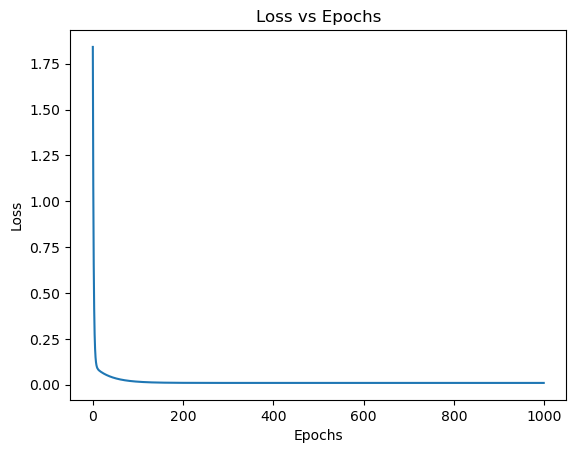

학습된 기울기 (w): 1.9937
학습된 편향 (b): 1.0222


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 6. 학습된 모델 시각화
# 손실값의 변화, 학습된 직선과 데이터를 시각화
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# 7. 학습된 모델의 가중치와 편향 출력
print(f"학습된 기울기 (w): {model.linear.weight.item():.4f}")
print(f"학습된 편향 (b): {model.linear.bias.item():.4f}")


- 위 그래프는 학습이 진행될 때마다 손실 값이 감소합니다.

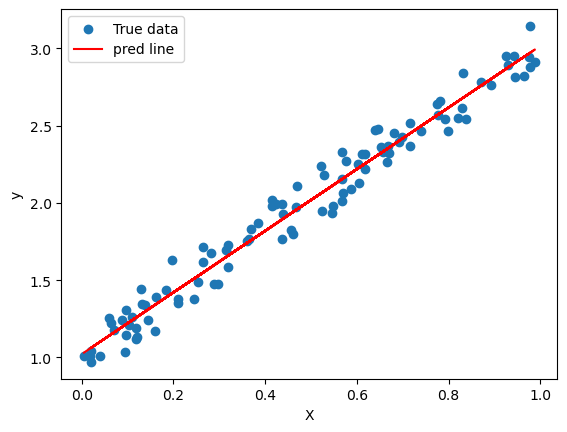

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 8. 모델 예측
with torch.no_grad():
    predictions = model(X_train)

# 학습 데이터와 예측값 시각화
plt.scatter(X_train.numpy(), y_train.numpy(), label='True data')
plt.plot(X_train.numpy(), predictions.numpy(), color='red', label='pred line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

- Adam 을 적용할때는 아래와 같이 코드를 작성할 수 있다.
- model = SimpleNN()
- criterion = nn.BCELoss()  # 이진 분류의 경우 BCELoss 사용
- optimizer = optim.Adam(model.parameters(), lr=0.001)

## 3.3 자동 미분의 개념

- 딥러닝 모델은 오차를 줄이기 위해 손실함수(loss function)를 적용하고 최적화 알고리즘으로 경사하강법을 사용합니다. 
- 경사하강법은 미분으로 함수의 변화율을 측정하며 곡선의 그래프에서 기울기(gradient)를 계산하여 오차의 최솟값 방향으로 이동을 하면서 가중치    최적화를 찾는 알고리즘 입니다.
- 파이토치에서는 이러한 알고리즘에 대하여 오토그래드(Autograd)를 사용하여 자동미분을 제공하고 있습니다.
- 신경망을 학습할 때 가중치 업데이트를 위해 필요한 기울기를 자동으로 계산합니다.

### 3.3.1 Autograd의 기본 원리

- Autograd는 딥러닝 모델에서 기울기를 자동으로 계산하고 학습을 하며 동적 계산 그래프를 사용하여 미분을 처리합니다.
- **requires_grad=True** 로 설정된 텐서는 연산에 대해 기울기를 계산할 수 있도록 추적됩니다.
- 예시: x = torch.tensor([1.0], requires_grad=True)
- 텐서 간의 연산이 이루어질 때마다 자동으로 계산 그래프에 추가됩니다. 
- y = x * 2라는 연산은 x와 2를 입력으로 받아 y라는 새로운 텐서를 생성하고 계산 그래프에 기록됩니다.

In [17]:
import torch

# requires_grad=True로 설정
# 스칼라값
x = torch.tensor(3.0, requires_grad=True)

# 2차 함수 정의
y = x**2

# 역전파 호출하여 기울기 계산하고 grad에 저장
# y를 x에 대해 미분
y.backward()

# x에 대한 기울기 출력
print(f'기울기: {x.grad}')

기울기: 6.0


### 3.3.2 기울기

- **기울기는 딥러닝에서 손실 함수에 대한 파라미터(가중치)의 미분을 의미**합니다. 
- 기울기를 계산하고 파라미터를 업데이트함으로써 모델을 학습시킬 수 있습니다.
- 기울기를 계산하는 과정에서 x.grad에 값이 저장되므로, 반복적인 학습을 위해서는 각 단계에서 기울기를 초기화해야 합니다. 
- optimizer.zero_grad()나 x.grad.zero_()를 사용하여 기울기를 수동으로 초기화할 수 있습니다.
- 기울기 비활성화는 torch.no_grad()를 사용합니다. 

- **기울기 비활성화**
  
  메모리 절약: 기본적으로 PyTorch는 모든 연산에 대해 기울기를 계산하여 역전파(backpropagation)에 사용할 수 있게 합니다. 
  with torch.no_grad()를 사용하면, 연산이 그래프에 기록되지 않기 때문에, 기울기를 계산하고 저장할 필요가 없어 메모리 사용량이 절약됩니다.


- **연산 속도 향상**

  기울기 계산을 생략함으로써 역전파를 위한 추가적인 계산이 이루어지지 않습니다. 이로 인해 연산 속도가 빨라집니다. 
  
  이는 주로 추론 단계에서 더 큰 차이를 만들어냅니다. 특히 큰 모델이나 배치 크기가 클 때 성능 차이가 눈에 띄게 나타날 수 있습니다.


- **불필요한 그래프 저장 방지**

  Autograd 그래프는 기본적으로 PyTorch에서 계산 그래프를 생성하여 후속 연산을 위한 기울기를 계산합니다. 
  
  이 그래프는 메모리를 많이 차지할 수 있습니다. torch.no_grad() 블록 내에서는 그래프가 생성되지 않으므로, 불필요한 그래프 저장을 방지할 수 있습니다.

In [18]:
import torch

# requires_grad=True로 텐서 생성
x = torch.tensor([2.0], requires_grad=True)
y = x**2  # y = x^2
z = y.sum()  # z = y의 합

# 역전파를 통해 기울기 계산
z.backward()  # dz/dx 계산 z = x^2이므로 dz/dx = 2x이고, x가 2일 때, 기울기는 4이다.
print(x.grad)  # x에 대한 기울기 출력

# x의 기울기 초기화
x.grad.zero_()

# 기울기 비활성화
with torch.no_grad(): 
    y = x**2
    z = y.sum()
    print(z)

tensor([4.])
tensor(4.)


## `그라디언트 계산 실습`

- x와 w 텐서에 대해 연산이 진행되면, 파이토치는 이를 계산하는 그래프를 생성합니다.
- z = y.sum()을 호출하면 이 값은 스칼라이기 때문에, z.backward()를 통해 역전파가 수행되고 각 텐서에 대한 기울기가 계산됩니다.
- x.grad와 w.grad에는 각 텐서에 대한 기울기가 저장됩니다.

In [19]:
import torch

# 입력 텐서 x와 파라미터 가중치 텐서 w를 생성 (requires_grad=True로 설정)
x = torch.randn(5, 5, requires_grad=True)  # 5x5 랜덤 텐서
w = torch.randn(5, 5, requires_grad=True)  # 5x5 랜덤 텐서

# y = x * w 연산
y = x * w

# y의 모든 원소에 대해 합을 구하는 스칼라 값 계산
z = y.sum()
print(z)

# 역전파 호출 기울기 계산
z.backward()

# w와 x에 대한 기울기 출력
print(f"x의 기울기: {x.grad}")
print(f"w의 기울기: {w.grad}")

tensor(-2.9257, grad_fn=<SumBackward0>)
x의 기울기: tensor([[-0.5880, -0.9279, -0.2974, -0.6392, -0.6190],
        [-0.7883,  1.3839, -1.2853,  0.1983, -0.2759],
        [-0.9338, -1.0123, -2.2021, -0.6239,  0.5904],
        [ 1.3108,  0.9008,  0.1473,  0.9189,  0.0279],
        [ 0.6170, -0.2884,  1.5252,  1.4791,  1.6320]])
w의 기울기: tensor([[-1.1623, -0.6136, -0.0206, -0.2021,  0.5260],
        [ 2.5011,  0.5668, -0.0165, -1.3233, -0.1608],
        [ 0.7801,  0.9546, -1.2056, -0.4515, -1.6357],
        [-2.3693, -0.9532, -0.3557, -1.3714,  0.1363],
        [-0.4892,  0.8211,  0.5246,  0.3450,  0.9934]])


In [20]:
import torch

#1. x는 10행 1열 텐서
# randn 정규분포에서 난수 추출
x = torch.randn(10, 1)
y = 3 * x + 2

#2. 매개변수 가중치 w와 편향 b
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 학습률
lr = 0.01

# 학습 반복
for epoch in range(100):
    # 예측 값
    y_pred = x * w + b
    
    # 손실 계산 (MSE)
    loss = ((y_pred - y) ** 2).mean()
    
    # 역전파 호출하여 기울기 계산
    loss.backward()
        
    # 파라미터 업데이트
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        
    # 기울기 초기화
    w.grad.zero_() # w 텐서의 기울기를 0으로 초기화
    b.grad.zero_() # x 텐서의 기울기를 0으로 초기화

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 10.445096969604492
Epoch 10, Loss: 5.901447296142578
Epoch 20, Loss: 3.5450668334960938
Epoch 30, Loss: 2.259557008743286
Epoch 40, Loss: 1.5156086683273315
Epoch 50, Loss: 1.057831048965454
Epoch 60, Loss: 0.7597408294677734
Epoch 70, Loss: 0.5563448071479797
Epoch 80, Loss: 0.4125905930995941
Epoch 90, Loss: 0.3084503412246704
